# Original Surface Plot

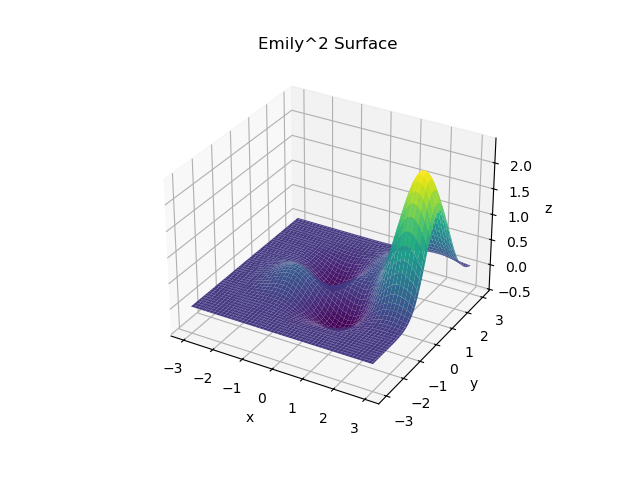

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# allows manipulation of matplotlib objects in a jupyter notebook
%matplotlib widget

# constants, chosen randomly within the ranges
# s.t.
# a1, a4 E [0.8, 1.5]
# a2, a3, a5, a6 E [0.5, 1.2]
a1, a2, a3 = 1.5, 0.6, 0.7
a4, a5, a6 = 0.8, 1.2, 0.99

# linear spacing for domain of functions
xRange = np.linspace(-3, 3, 100)
yRange = np.linspace(-3, 3, 100)
# grid of points
X, Y = np.meshgrid(xRange,yRange)

# surface
Z = (a1*X*Y - a2*X**3 - a3*Y**2) *np.exp(-X**2 - Y**2) + (a4*X**2 - a5*X*Y + a6*Y**2)*np.exp(-(X-2)**2 -(Y-1)**2)

plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Emily^2 Surface")
plt.show()

## This section is for contour plotting ##

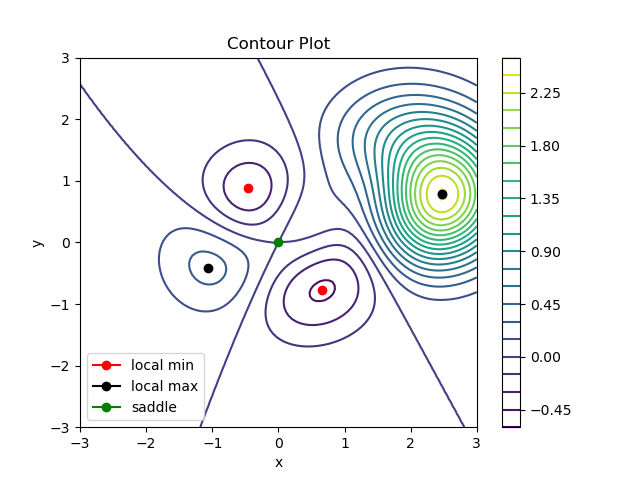

In [16]:
#Contour plot
plt.close('all')
plt.figure()
plt.contour(X,Y,Z,20,cmap='viridis')
# critical points, points calculated below
plt.plot(0.66611993, -0.78024662, marker='o', color='r', label="local min")
plt.plot(-0.45330632,  0.87671602, marker='o', color='r')
plt.plot(-1.05783737, -0.40857482, marker='o', color='k')
plt.plot(2.47926012, 0.77939788, marker='o', color='k', label="local max")
plt.plot(0,0, marker='o', color='g', label='saddle')

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title("Contour Plot")
plt.legend(loc='lower left')
plt.show()

## Calculations for minimum values
Calculations require an initial guess as input

source for documentation and example: https://docs.scipy.org/doc/scipy/tutorial/optimize.html 

In [17]:
# numerical calculations
from scipy.optimize import minimize

# objective function 
# the same surface as plotted above
def F(x) :
    return (a1*x[0]*x[1] - a2*x[0]**3 - a3*x[1]**2) *np.exp(-x[0]**2 - x[1]**2) + (a4*x[0]**2 - a5*x[0]*x[1] + a6*x[1]**2)*np.exp(-(x[0]-2)**2 -(x[1]-1)**2)

# initial guess
# past initial guesses for minimums include
# x0 = np.array([-0.4, 0.9])
x0 = np.array([-0.5, 1])

result = minimize(F, x0, method="CG")

print("Optimization successful: ", result.success)
print("Minimum value (fun):", result.fun)
print("Optimal parameters (x): ", result.x)
print("Number of iterations: ", result.nit)

Optimization successful:  True
Minimum value (fun): -0.40371962608218115
Optimal parameters (x):  [-0.45330632  0.87671602]
Number of iterations:  4


## Calculations for maximum values

calculations require an initial guess as input

In [14]:
# Maximum values found using the negative function values and scipy.optimize.minimize() 

def negF(x) :
    return -1* ((a1*x[0]*x[1] - a2*x[0]**3 - a3*x[1]**2) *np.exp(-x[0]**2 - x[1]**2) + (a4*x[0]**2 - a5*x[0]*x[1] + a6*x[1]**2)*np.exp(-(x[0]-2)**2 -(x[1]-1)**2))

# initial guess

# x1 = np.array([-1, -0.5]) # local max
# x1 = np.array([2.5, 0.8]) # local max
x1 = np.array([0.7,-0.7]) # saddle point

result2 = minimize(negF, x1, method="CG")

print("Optimization successful: ", result2.success)
print("Maximum value (fun):", -1*result2.fun)
print("Optimal parameters (x): ", result2.x)
print("Number of iterations: ", result2.nit)

Optimization successful:  True
Maximum value (fun): 2.4146918820216974
Optimal parameters (x):  [2.47926013 0.77939789]
Number of iterations:  9


## Gradient calculations 

source: https://www.sympy.org/en/index.html

calculus examples for sympy: https://certik.github.io/scipy-2013-tutorial/html/tutorial/calculus.html

lambdify documentation: https://docs.sympy.org/latest/modules/utilities/lambdify.html

Quote: 
"The primary purpose of this function is to provide a bridge from SymPy expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath, and tensorflow. In general, SymPy functions do not work with objects from other libraries, such as NumPy arrays, and functions from numeric libraries like NumPy or mpmath do not work on SymPy expressions. lambdify bridges the two by converting a SymPy expression to an equivalent numeric function.

The basic workflow with lambdify is to first create a SymPy expression representing whatever mathematical function you wish to evaluate. This should be done using only SymPy functions and expressions. Then, use lambdify to convert this to an equivalent function for numerical evaluation. "

In [18]:
# initial code sample from google ai
# has been further developed by referencing relevant documentation

# gradient
import sympy as sp
from sympy import diff, init_printing
from scipy.optimize import fsolve
init_printing(use_unicode=True) # nice printing of sympy objects

# specify the function variables
x, y, z, u, v = sp.symbols('x y z u v', real=True)
# specify the function, sp.exp() is used to exponentiate e
f = (a1*x*y - a2*x**3 - a3*y**2)*sp.exp(((-x**2)-(y**2))) + (a4*x**2 - a5*x*y + a6*y**2)*sp.exp((-(x-2)**2 -((y-1)**2)))

# symbolic partials
df_dx_sym = diff(f, x)
df_dy_sym = diff(f, y)

# convert to numeric
# lambdify parameters are ((function variables), function representation, numeric library)
df_dx = sp.lambdify((x,y), df_dx_sym, ['numpy', 'scipy'])
df_dy = sp.lambdify((x,y), df_dy_sym, ['numpy', 'scipy'])

def gradient(inputPoints) :
    xVal, yVal = inputPoints
    return [df_dx(xVal, yVal), df_dy(xVal, yVal)]

initialGuess = [2.5, 0.7]

# scipy.fsolve finds the roots of a function, so finding the roots of the gradient
# will find where grad F = 0, thus, a critical point
critPt = fsolve(gradient, initialGuess)

# symbolic second partials
df_dx_sym2 = diff(df_dx_sym, x)
df_dy_sym2 = diff(df_dy_sym, y)
df_dxdy_sym = diff(df_dx_sym, y)

# convert to numeric
df_dx2 = sp.lambdify((x,y), df_dx_sym2, ['numpy', 'scipy'])
df_dy2 = sp.lambdify((x,y), df_dy_sym2, ['numpy', 'scipy'])
df_dxdy = sp.lambdify((x,y), df_dxdy_sym, ['numpy', 'scipy'])

# unpack critical point
xCrit = critPt[0]
yCrit = critPt[1]

# Fxx Fxy
# Fyx Fyy
hessianMatrix = np.array([[df_dx2(xCrit, yCrit), df_dxdy(xCrit, yCrit)],
                         [df_dxdy(xCrit, yCrit), df_dy2(xCrit, yCrit)]])

# calculate the determinant of the Hessian matrix
det = np.linalg.det(hessianMatrix)

if det < 0:
    print(f"The critical point at {critPt} is a saddle.")
elif det > 0:
    if (df_dx2(xCrit, yCrit)) > 0:
        print("Local minimum at")
    else :
        print("Local maximum at")
    print(critPt)
else :
    print("Not enough info")


Local maximum at
[2.47926012 0.77939789]


## plot for a vector field of the gradient

The quiver function for matplotlib is how you plot vectors/arrows

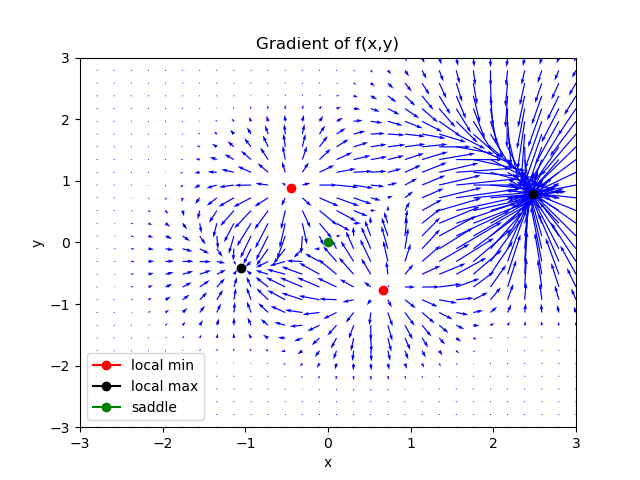

In [6]:
# number of points in the 3rd parameter control the density of the vectors in the vector field

#   np.linspace(start-point, end-point, number-of-points)
quiverRangex = np.linspace(-3, 3, 30)
quiverRangey = np.linspace(-3, 3, 30)
Xq, Yq = np.meshgrid(quiverRangex,quiverRangey)

fig, ax = plt.subplots()

# scale parameter controls the length of the vectors, increasing the scale will make the vectors SHORTER
plt.quiver(Xq, Yq, df_dx(Xq,Yq), df_dy(Xq,Yq), color='b', scale=15)
plt.plot(0.66611993, -0.78024662, marker='o', color='r', label="local min")
plt.plot(-0.45330632,  0.87671602, marker='o', color='r')
plt.plot(-1.05783737, -0.40857482, marker='o', color='k')
plt.plot(2.47926012, 0.77939788, marker='o', color='k', label="local max")
plt.plot(0,0, marker='o', color='g', label='saddle')
# Setting x, y boundary limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.title('Gradient of f(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.show()

## zooming in the vector field on smaller regions of interest

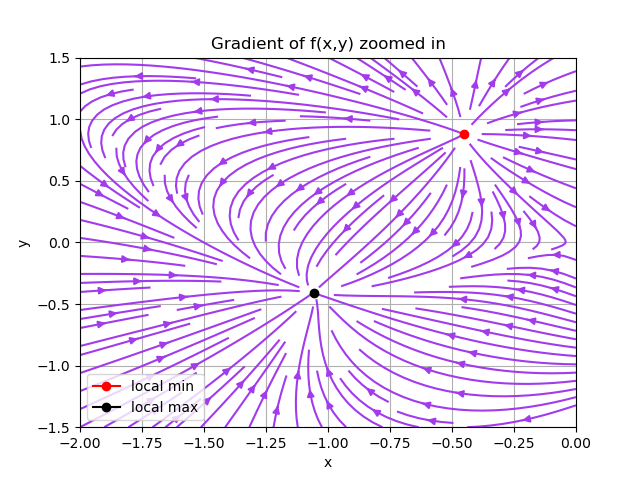

In [16]:
#   np.linspace(start-point, end-point, number-of-points)
plt.close('all')
quiverRangex2 = np.linspace(-2, 0, 30) 

quiverRangey2 = np.linspace(-1.5, 1.5, 30)
Xq2, Yq2 = np.meshgrid(quiverRangex2,quiverRangey2)

# Depict illustration
plt.figure()
ax = fig.add_subplot(111)
plt.streamplot(Xq2, Yq2, df_dx(Xq2,Yq2), df_dy(Xq2,Yq2), density=1.4, linewidth=None, color='#A23BEC')
plt.plot(-0.45330632,  0.87671602, marker='o', color='r', label='local min')
plt.plot(-1.05783737, -0.40857482, marker='o', color='k', label='local max')
# Setting x, y boundary limits
plt.xlim(-2, 0)
plt.ylim(-1.5, 1.5)

# Show plot with grid
plt.grid()

plt.title('Gradient of f(x,y) zoomed in')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')
ax.set_aspect('equal')
plt.show()

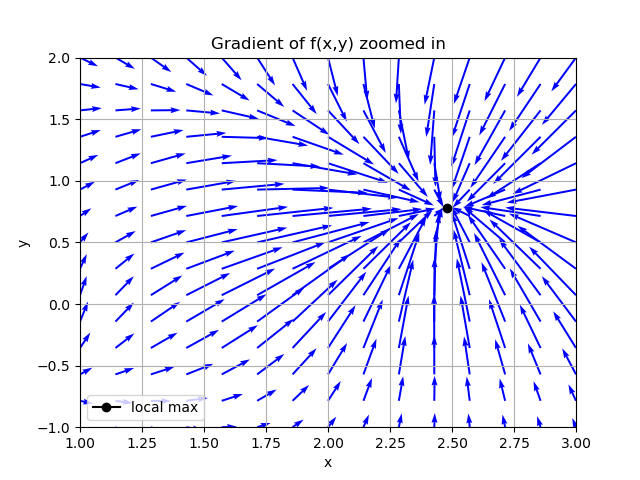

In [7]:
#   np.linspace(start-point, end-point, number-of-points)
plt.close('all')
quiverRangex3 = np.linspace(1, 3, 15)
quiverRangey3 = np.linspace(-1, 2, 15)
Xq3, Yq3 = np.meshgrid(quiverRangex3,quiverRangey3)

# Depict illustration
plt.figure()
ax = fig.add_subplot(111)
plt.quiver(Xq3, Yq3, df_dx(Xq3,Yq3), df_dy(Xq3,Yq3), scale=15, color='b')
plt.plot(2.47926012, 0.77939788, marker='o', color='k', label="local max")
# Setting x, y boundary limits
plt.xlim(1, 3)
plt.ylim(-1, 2)

# Show plot with grid
plt.grid()

plt.title('Gradient of f(x,y) zoomed in')
plt.xlabel('x')
plt.ylabel('y')
ax.set_aspect('equal')
plt.legend(loc='lower left')
plt.show()

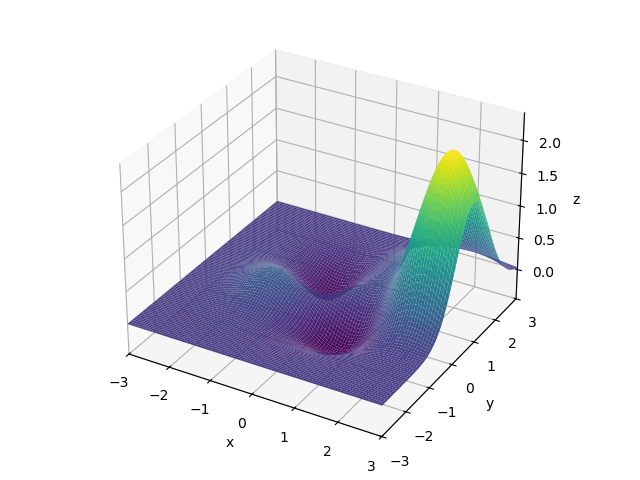

In [ ]:
# parameterize the surface 
# plot3d_parametric_surface(expr_x, expr_y, expr_z, range_u, range_v, **kwargs) - sympy documentation
# https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot3d_parametric_surface


from sympy.plotting import plot3d_parametric_surface


plot3d_parametric_surface(u, v, (a1*u*v - a2*u**3 - a3*v**2)*sp.exp(((-u**2)-(v**2))) + (a4*u**2 - a5*u*v + a6*v**2)*sp.exp((-(u-2)**2 -((v-1)**2))),
    (u, -3, 3), (v, -3, 3))


region doc: https://docs.sympy.org/latest/modules/vector/api/classes.html#sympy.vector.parametricregion.ParametricRegion
flux doc: https://docs.sympy.org/latest/modules/vector/vector_integration.html 

In [20]:
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate

C = CoordSys3D('C') # 3d coord sys

# choosing a constant upward field
F = 0*C.i + 0*C.j + -1*C.k

region = ParametricRegion((u,v,(a1*u*v - a2*u**3 - a3*v**2)*sp.exp(((-u**2)-(v**2))) + (a4*u**2 - a5*u*v + a6*v**2)*sp.exp((-(u-2)**2 -((v-1)**2)))),
    (u, -3, 3), (v, -3, 3))

flux = vector_integrate(F, region)
print(flux)


-36


In [27]:
from sympy import Matrix

# Create vectors as SymPy Matrices
surf = Matrix([x,y, (a1*x*y - a2*x**3 - a3*y**2)*sp.exp(((-x**2)-(y**2))) + (a4*x**2 - a5*x*y + a6*y**2)*sp.exp((-(x-2)**2 -((y-1)**2)))])
v1 = Matrix([diff(surf[0], x), diff(surf[1], x), diff(surf[2], x)]) # partial w.r.t x
v2 = Matrix([diff(surf[0], y), diff(surf[1], y), diff(surf[2], y)]) # partial w.r.t y

# Compute the cross product using the .cross() method
surf_normal = v1.cross(v2)

# simple constant upward vector field
vecField = Matrix([0,0,1])

# dotting the normal with the vector field
integrand = surf_normal.dot(vecField)

simpInt = sp.simplify(integrand)
trigInt = sp.factor(simpInt)
rewritten = sp.expand(integrand)

# print(integrand)
# print(simpInt)
# print(trigInt)
# print(sp.simplify(rewritten))

# compute flux by integrating over the region where x=[-3,3] y=[-3,3]
flux = sp.integrate(trigInt, (y,-3,3), (x,-3,3))
approxFlux = flux.evalf()
print(f"The flux through the surface on the region is {flux}")
print(approxFlux)


The flux through the surface on the region is 36
36.0000000000000


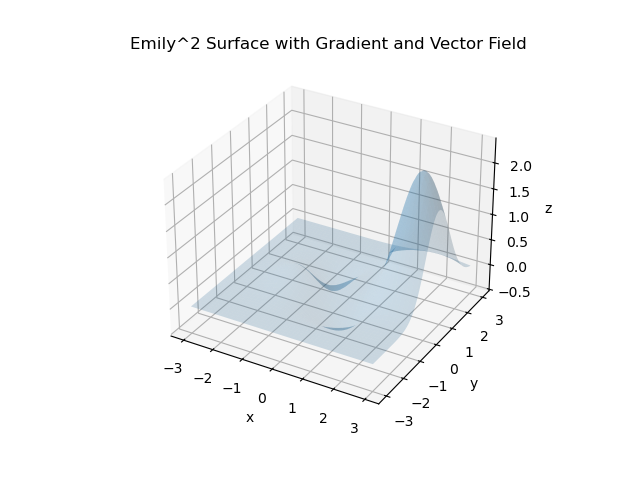

In [29]:
plt.close('all')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, alpha=0.2) # alpha controls transparency 1:opaque 0:clear
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Emily^2 Surface with Gradient and Vector Field")
plt.show()

# sample the surface
numVec = 4
rangeX = [-2,2]
rangeY = [-2,2]

xs = np.linspace(rangeX[0],rangeX[1],numVec)
ys = np.linspace(rangeY[0], rangeY[1],numVec)

# get numerical values
f_numpy = sp.lambdify((x, y), f, "numpy")
xvals, yvals = np.meshgrid(xs, ys)
zvals = f_numpy(xvals, yvals)

vecX = np.zeros_like(xvals)
vecY = np.zeros_like(yvals)
vecZ = np.ones_like(zvals)

# gradient field
fx = diff(f, x)
fy = diff(f, y)
# normal vector: n = rx ×ry = ⟨−fx,−fy , 1⟩

fx_np = sp.lambdify((x,y), fx, "numpy")
fy_np = sp.lambdify((x,y), fy, "numpy")

compx = -1*fx_np(xvals+0.1, yvals) / ((fx_np(xvals+0.1, yvals)**2 + fy_np(xvals+0.1, yvals)**2 + 1)**(1/2))
compy = -1*fy_np(xvals+0.1, yvals) / ((fx_np(xvals+0.1,yvals)**2 + fy_np(xvals+0.1,yvals)**2 + 1)**(1/2))
compz = 1 / ((fx_np(xvals+0.1,yvals)**2 + fy_np(xvals+0.1,yvals)**2 + 1)**(1/2))

ax.quiver(
    xvals, yvals, zvals, # location for vectors
    xvals/(xvals**2 + yvals**2+zvals**2)**(1/2), yvals/(xvals**2 + yvals**2+zvals**2)**(1/2), zvals/(xvals**2 + yvals**2+zvals**2)**(1/2), # vector component values
    color='g'
);

# gradient
ax.quiver(
    xvals+0.1, yvals, zvals,
    compx, compy, compz,
    color='r'
);
